# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [89]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code

from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm 
import pickle

from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [90]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different values alpha and sigma can take
alpha_values = [0.25, 0.50, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# Create empty arrays to store the results for each combination of alpha and sigma
HF_values = np.zeros((len(alpha_values), len(sigma_values)))
HM_values = np.zeros((len(alpha_values), len(sigma_values)))
HF_HM_ratios = np.zeros((len(alpha_values), len(sigma_values)))

# Solve the model for each combination of parameters and store the results
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        model.par.alpha = alpha
        model.par.sigma = sigma
        result = model.solve_discrete()
        HF_values[i,j] = result.HF
        HM_values[i,j] = result.HM
        HF_HM_ratios[i,j] = result.HF / result.HM
        
# Save the results arrays using pickle
with open('results.pkl', 'wb') as f:
    pickle.dump((alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results.pkl', 'rb') as f:
    alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios = pickle.load(f)

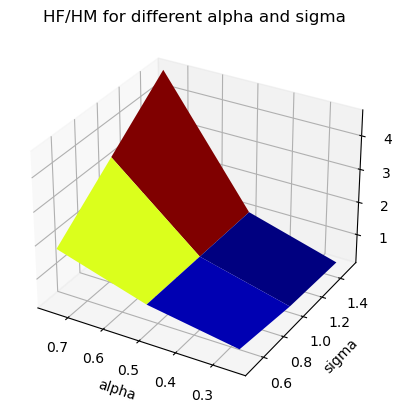

In [91]:
alpha = np.array([0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75]).reshape(3,3)
sigma = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5, 1, 1.5]).reshape(3,3)

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
#ax.plot_surface(alpha_values,sigma_values,HF_HM_ratios,cmap=cm.jet)
ax.plot_surface(alpha,sigma,HF_HM_ratios,cmap=cm.jet)
# b. add labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')

# c. invert xaxis
ax.invert_xaxis()

# d. add title
ax.set_title('HF/HM for different alpha and sigma')

plt.show()

# Question 2

Explain your code and procedure

In [92]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different values alpha and sigma can take
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]


# Solve the model for each combination of parameters and store the results
HF_values = []
HM_values = []
HF_HM_ratios = []
for wage in female_wage:
    model.par.wF = wage
    result = model.solve_discrete()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# Save the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)


In [93]:
HF_values

[5.0, 4.5, 4.5, 4.0, 4.0]

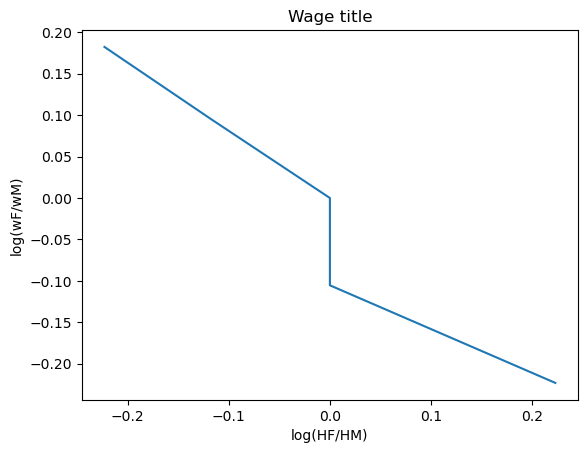

In [94]:
# Define the two arrays
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot arr1 against arr2
ax.plot(Ln_HFHM, Ln_Wage)

# Add axis labels and a title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Wage title')

# Display the plot
plt.show()

#When female wages increase compared to the male wage, female home produciton decreases. 
#To elaborate, wage equality leads to equality in home prodution, whereas wage inequality leads to disparaties in the home produciton. 
#We can observe that when female wages are higher than the male wages, the decreasing female home production is deminishing. 

# Question 3

Explain your code and procedure

In [95]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different values alpha and sigma can take
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]


# Solve the model for each combination of parameters and store the results
HF_values = []
HM_values = []
HF_HM_ratios = []
for wage in female_wage:
    model.par.wF = wage
    result = model.solve_continuous()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# Save the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)

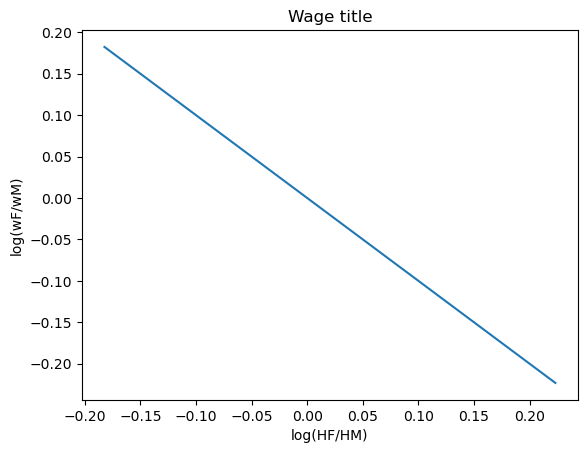

In [96]:
# Define the two arrays
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot arr1 against arr2
ax.plot(Ln_HFHM, Ln_Wage)

# Add axis labels and a title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Wage title')

# Display the plot
plt.show()

# Question 4

In [101]:
model.sol.HM_vec = np.asarray(HM_values)
model.sol.HF_vec = np.asarray(HF_values)
reg = model.run3_regression()
print(reg)

HM_vec: [4.09256025 4.27104739 4.45449074 4.6420016  4.83262967]
HF_vec: [5.11561184 4.74567029 4.4545075  4.21994127 4.02719881]
x: [-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
y: [ 2.23126258e-01  1.05373596e-01  3.76349561e-06 -9.53244408e-02
 -1.82319716e-01]
A: [[ 1.         -0.22314355]
 [ 1.         -0.10536052]
 [ 1.          0.        ]
 [ 1.          0.09531018]
 [ 1.          0.18232156]]
b0: -2.4426029762541797e-06
b1: -0.9999870864642453
(-2.4426029762541797e-06, -0.9999870864642453)
